In [1]:
# only adjust settings in this cell
state = 'NC'
root_name = 'Wake'     # which county will root our district (or county_cluster==multi-district)?
k = 14                 # the state has this number of districts
deviation = 1          # use: L=ideal_population-deviation, U=ideal_population-deviation
size = 4               # size=1 for single district, size=2 for double district, ...
obj_type = 'inverse_polsby_popper' # compactness objectives: cut_edges, perimeter, or polsby_popper

In [2]:
filepath = '..\\dat\\'
filename = state + '_county.json'

from util import read_graph_from_json
G = read_graph_from_json( filepath + filename) 

In [3]:
G._k = k
G._size = size

print("State has total of k =",G._k,"districts")
print("We seek a county cluster of size =",G._size)

State has total of k = 14 districts
We seek a county cluster of size = 4


In [4]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / G._k

# Calculate lower and upper population limits
from math import ceil, floor
G._L = ceil( ideal_population - deviation )
G._U = floor( ideal_population + deviation )

print("Single district lower population limit L =",G._L)
print("Single district upper population limit U =",G._U)

Single district lower population limit L = 745670
Single district upper population limit U = 745671


In [5]:
# Require this county be in our district/county_cluster/multi_district
G._root = G._root = [ i for i in G.nodes if G.nodes[i]['NAME20'] == root_name ][0]
print("Use",root_name,"County to be the root. In our graph, this is vertex #",G._root)

Use Wake County to be the root. In our graph, this is vertex # 39


In [6]:
from optimization import enumerate_top_districts
districts = enumerate_top_districts( G, obj_type=obj_type, enumeration_limit=10 )

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-19
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 793 rows, 935 columns and 4107 nonzeros
Model fingerprint: 0x4b0af7d0
Model has 1 quadratic constraint
Variable types: 491 continuous, 444 integer (444 binary)
Coefficient statistics:
  Matrix range     [7e-04, 1e+06]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+06]
Presolve removed 109 rows and 107 columns
Presolve time: 0.01s
Presolved: 684 rows, 828 columns, 3668 nonzeros
Presolved model has 1 quadratic constraint(s)
Va

 1198057 674920    3.45495   51   12          -    2.68765      -  23.3  355s
 1211195 682314    5.73739   53   25          -    2.69066      -  23.3  360s
 1220912 687914    7.48989   45   32          -    2.69291      -  23.3  365s
 1230438 693329    3.38530   36   14          -    2.69481      -  23.3  370s
 1243425 699708    4.12441   45    7          -    2.69739      -  23.3  375s
 1252259 705446    4.81351   49    4          -    2.69898      -  23.3  380s
 1265712 712314    3.67718   32   49          -    2.70160      -  23.3  385s
 1276932 718878    3.87778   39    4          -    2.70379      -  23.3  390s
found [0, 2, 8, 11, 12, 18, 21, 22, 31, 36, 39, 42, 47, 51, 60, 64, 65, 67, 68, 75, 82, 88, 90, 91, 96] with objective = 5.764880330034427
   ^added to list!
 1287863 724125    3.79482   41   33          -    2.70597      -  23.3  395s
 1299861 731796    6.26655   46   41          -    2.70853      -  23.3  400s
 1308987 736952    2.96774   51   43          -    2.71047    

 2184305 1213193    3.64942   44    7          -    2.84911      -  23.2  860s
 2193982 1218941    4.49362   40   53          -    2.85014      -  23.2  866s
 2202378 1222824    6.48160   37   76          -    2.85112      -  23.2  871s
 2209439 1227452 infeasible   65               -    2.85203      -  23.2  875s
 2217740 1231909    5.29613   47   18          -    2.85299      -  23.2  880s
 2225962 1236186    3.31943   37   22          -    2.85403      -  23.2  885s
 2234434 1240233    7.10686   39   54          -    2.85492      -  23.2  890s
 2241578 1244751    6.88653   50   18          -    2.85608      -  23.2  895s
 2250386 1249565 infeasible   53               -    2.85709      -  23.2  900s
 2258397 1253251    4.22795   54    4          -    2.85806      -  23.2  905s
 2265639 1257990    9.18068   51   26          -    2.85876      -  23.2  910s
 2274453 1262163   10.46316   42   25          -    2.85981      -  23.2  915s
 2283179 1266468 infeasible   45               -    

 2909499 1596259    4.12572   52    6          -    2.93294      -  23.2 1331s
 2914867 1599069    5.86718   40   40          -    2.93371      -  23.2 1335s
found [1, 2, 3, 11, 13, 19, 21, 24, 26, 27, 30, 31, 36, 39, 41, 55, 69, 71, 77, 83, 92, 94] with objective = 2.9338396206978588
   replaced worse solution with objective = 7.269295293284392
adding cut saying that objective should be less than 5.764880330034427
 2921829 1601767    5.36231   50   10          -    2.93476      -  23.2 1340s
 2926936 1604314    3.96555   42    6          -    2.93558      -  23.2 1345s
 2935060 1607838    4.86853   44   19          -    2.93684      -  23.2 1351s
 2942385 1610963    3.99519   51   25          -    2.93806      -  23.2 1355s
 2948064 1613440 infeasible   41               -    2.93906      -  23.2 1360s
 2955783 1616935    4.83713   44    9          -    2.94027      -  23.2 1366s
 2962637 1619359 infeasible   49               -    2.94133      -  23.2 1370s
 2968131 1622478    3.49871 

 3475759 1848781    4.48160   39   65          -    3.01623      -  23.2 1790s
 3483733 1852258    3.04947   37   76          -    3.01725      -  23.2 1796s
 3488447 1854268    5.06473   40   90          -    3.01778      -  23.2 1800s
 3494156 1856814    4.55705   34   40          -    3.01850      -  23.2 1805s
 3499672 1859373    4.53884   45   36          -    3.01918      -  23.2 1810s
 3506923 1862586    4.83451   40   42          -    3.02016      -  23.2 1815s
 3512556 1865167 infeasible   40               -    3.02092      -  23.2 1820s
 3518509 1867679    3.88405   43   18          -    3.02178      -  23.2 1825s
 3525482 1870085    4.29943   55   30          -    3.02265      -  23.2 1830s
 3531321 1873111 infeasible   56               -    3.02351      -  23.2 1836s
 3534964 1874647    4.60393   41   65          -    3.02398      -  23.2 1840s
 3542269 1877135    4.45908   65   12          -    3.02494      -  23.2 1845s
 3547980 1880327    4.34581   34   94          -    

 4000494 2065498    4.36604   45   38          -    3.08884      -  23.1 2255s
 4007652 2068309    4.66206   43   60          -    3.08967      -  23.1 2261s
 4013822 2070867 infeasible   40               -    3.09051      -  23.1 2267s
 4017250 2072286    3.95220   45   17          -    3.09106      -  23.1 2270s
 4024339 2075120 infeasible   40               -    3.09203      -  23.1 2276s
 4027778 2076609    4.15777   27   22          -    3.09249      -  23.1 2280s
 4035068 2079400    3.88023   45   16          -    3.09339      -  23.1 2286s
 4040759 2081532    4.72119   59   15          -    3.09412      -  23.1 2291s
 4045372 2083375 infeasible   36               -    3.09477      -  23.1 2296s
 4050883 2085621 infeasible   58               -    3.09543      -  23.1 2301s
 4055644 2087315    4.32900   47   97          -    3.09606      -  23.1 2305s
 4061389 2089626    4.06559   36   81          -    3.09682      -  23.1 2311s
 4066402 2091582    4.97030   40   25          -    

 4503337 2250853 infeasible   45               -    3.15939      -  23.0 2740s
 4510332 2253230 infeasible   38               -    3.16047      -  23.0 2747s
 4513808 2254294    4.40113   36   11          -    3.16115      -  23.0 2751s
 4518705 2255854    4.47188   45   40          -    3.16182      -  23.0 2755s
 4522398 2257054    3.78584   34   12          -    3.16241      -  23.0 2760s
 4529663 2258985    3.61994   57    5          -    3.16357      -  23.0 2766s
 4533278 2260550    3.64779   31   63          -    3.16409      -  23.0 2771s
 4537992 2262187    3.73286   31   38          -    3.16481      -  23.0 2775s
 4543830 2264117 infeasible   40               -    3.16570      -  23.0 2782s
 4548455 2265237    3.59603   53   22          -    3.16644      -  23.0 2786s
 4552217 2267051    4.07512   49   49          -    3.16692      -  23.0 2790s
 4559300 2268871    3.43799   45    7          -    3.16797      -  23.0 2796s
 4562783 2270378    3.77985   52    7          -    

 5013490 2418292    4.22484   44   13          -    3.23075      -  22.9 3261s
 5018352 2419841    3.58309   41   53          -    3.23136      -  22.9 3266s
 5024085 2421622    4.48053   38   21          -    3.23206      -  22.9 3271s
 5028897 2423116 infeasible   44               -    3.23268      -  22.9 3276s
 5033637 2424222    3.44473   43   73          -    3.23336      -  22.9 3280s
 5037282 2425857    4.27615   50   25          -    3.23378      -  22.9 3285s
 5044414 2427736 infeasible   67               -    3.23471      -  22.9 3291s
 5048011 2429273 infeasible   45               -    3.23515      -  22.9 3296s
 5052813 2430711    3.62331   56    6          -    3.23585      -  22.9 3300s
found [1, 2, 8, 11, 12, 16, 18, 19, 22, 24, 26, 31, 39, 40, 42, 45, 47, 51, 55, 57, 60, 64, 65, 68, 69, 75, 79, 82, 88, 90, 91, 92, 94, 96, 98] with objective = 3.236092973506508
   replaced worse solution with objective = 4.515637992677568
adding cut saying that objective should be less 

 5465392 2551468    3.39043   35   18          -    3.29178      -  22.8 3762s
 5470533 2552855    4.04390   44   16          -    3.29253      -  22.8 3767s
 5473076 2553461    3.59696   52    8          -    3.29279      -  22.8 3770s
 5477236 2554327    4.02007   54    9          -    3.29332      -  22.8 3775s
 5481168 2555905 infeasible   42               -    3.29378      -  22.8 3781s
 5486240 2557325 infeasible   45               -    3.29440      -  22.8 3785s
 5490675 2558348    4.02610   51    7          -    3.29498      -  22.8 3792s
 5494097 2559333    4.00604   42   28          -    3.29550      -  22.8 3797s
 5496698 2560126 infeasible   62               -    3.29572      -  22.8 3800s
 5501802 2561386    3.73863   34  118          -    3.29642      -  22.8 3805s
 5507591 2563211    3.83288   48   41          -    3.29717      -  22.8 3813s
 5510128 2563988    3.91469   35   53          -    3.29754      -  22.8 3815s
 5514624 2565268    3.86432   46   11          -    

 5889987 2668694    3.63972   55   38          -    3.32190      -  22.7 4280s
 5893488 2669457    3.88391   32   36          -    3.32190      -  22.7 4285s
 5900634 2671431    3.67756   46    4          -    3.32190      -  22.7 4291s
 5904687 2672388    3.48910   44   10          -    3.32190      -  22.7 4296s
 5908322 2673744    4.14051   28   72          -    3.32190      -  22.7 4301s
 5913004 2674869 infeasible   32               -    3.32190      -  22.7 4307s
 5916852 2676053    4.10857   45   35          -    3.32190      -  22.7 4311s
 5921258 2677173    3.71575   37   54          -    3.32190      -  22.7 4317s
 5924449 2678125    4.19326   63   28          -    3.32190      -  22.7 4322s
 5927033 2678694    4.21967   44   32          -    3.32190      -  22.7 4325s
 5931684 2679882    3.44613   32   82          -    3.32190      -  22.7 4330s
 5934782 2680746 infeasible   39               -    3.32190      -  22.7 4335s
 5942051 2682432 infeasible   41               -    

 6316213 2780540    3.79872   48   33          -    3.32190      -  22.6 4801s
 6319747 2781645 infeasible   58               -    3.32190      -  22.6 4806s
 6324268 2782741    4.15131   38    4          -    3.32190      -  22.6 4811s
 6327879 2783769    4.09746   41   32          -    3.32190      -  22.6 4816s
 6332364 2784649 infeasible   55               -    3.32190      -  22.6 4821s
 6335983 2785861    4.38400   52   44          -    3.32190      -  22.6 4826s
 6340555 2787021    4.16062   48    8          -    3.32190      -  22.6 4831s
 6343981 2787843    3.98851   46   33          -    3.32190      -  22.6 4835s
 6348747 2789096    4.40561   48   22          -    3.32190      -  22.6 4840s
 6352181 2789975    4.38086   41    8          -    3.32190      -  22.6 4845s
 6357045 2791325 infeasible   43               -    3.32190      -  22.6 4850s
 6363506 2792746    3.89870   49    7          -    3.32190      -  22.6 4857s
 6367418 2793895 infeasible   50               -    

 6709920 2868996 infeasible   50               -    3.32190      -  22.5 5271s
 6713746 2869737    4.06580   45    7          -    3.32190      -  22.5 5277s
 6715830 2870195 infeasible   57               -    3.32190      -  22.5 5280s
 6719370 2870758    4.09594   49    7          -    3.32190      -  22.5 5285s
 6724204 2871246 infeasible   55               -    3.32190      -  22.5 5290s
 6729979 2872164    3.64916   40   40          -    3.32190      -  22.5 5298s
 6732214 2872539    3.62437   42   58          -    3.32190      -  22.5 5300s
 6738009 2873476    3.79906   47   30          -    3.32190      -  22.5 5307s
 6740350 2873853 infeasible   54               -    3.32190      -  22.5 5310s
 6746423 2875081    3.66895   37    9          -    3.32190      -  22.5 5317s
 6750271 2875804    3.61805   44    8          -    3.32190      -  22.5 5322s
 6755185 2876799    3.59679   39   20          -    3.32190      -  22.5 5327s
 6758499 2877404    4.12902   48    7          -    

 7110776 2912000 infeasible   40               -    3.32190      -  22.4 5775s
 7115459 2911785    3.87032   36    8          -    3.32190      -  22.4 5780s
 7119425 2911916 infeasible   42               -    3.32190      -  22.4 5786s
 7124100 2911886    3.53019   37   11          -    3.32190      -  22.4 5791s
 7127810 2912186 infeasible   40               -    3.32190      -  22.4 5797s
 7131681 2912134    3.90246   37   11          -    3.32190      -  22.4 5802s
 7134099 2912234    3.61367   40   11          -    3.32190      -  22.4 5805s
 7138899 2912173    3.72697   45    7          -    3.32190      -  22.4 5810s
 7142670 2912272 infeasible   35               -    3.32190      -  22.4 5816s
 7146223 2912341    3.94326   48   90          -    3.32190      -  22.4 5820s
 7150993 2912525    3.91075   38   82          -    3.32190      -  22.4 5826s
 7154668 2912638    3.53591   33   11          -    3.32190      -  22.4 5831s
 7159478 2912797    3.65149   43    7          -    

 7709446 2606831 infeasible   55               -    3.32190      -  22.2 6260s
 7741756 2574498 infeasible   58               -    3.32190      -  22.1 6265s
 7776119 2540128 infeasible   61               -    3.32190      -  22.1 6270s
 7808299 2507975 infeasible   52               -    3.32190      -  22.1 6275s
 7842719 2473562 infeasible   48               -    3.32190      -  22.1 6280s
 7874947 2441284 infeasible   52               -    3.32190      -  22.0 6285s
 7909480 2406813 infeasible   44               -    3.32190      -  22.0 6290s
 7943923 2372367 infeasible   44               -    3.32190      -  22.0 6295s
 7978375 2337925 infeasible   55               -    3.32190      -  21.9 6300s
 8012821 2303429 infeasible   36               -    3.32190      -  21.9 6305s
 8047346 2268933 infeasible   41               -    3.32190      -  21.9 6310s
 8081925 2234368 infeasible   49               -    3.32190      -  21.8 6315s
 8116310 2199904 infeasible   52               -    

In no particular order, the top 10 clusters are:


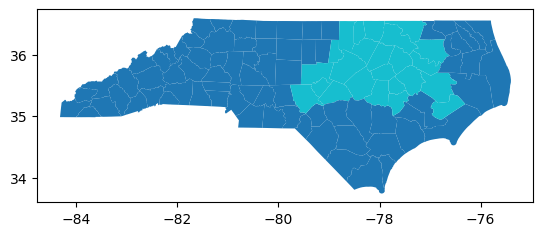

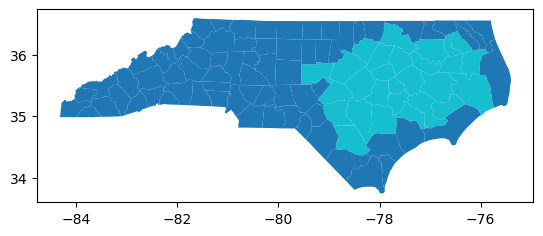

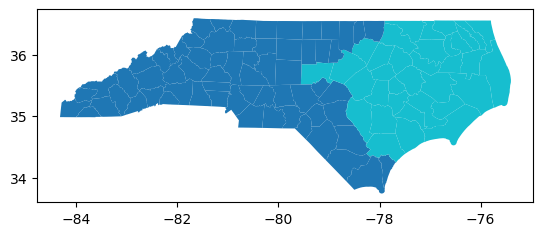

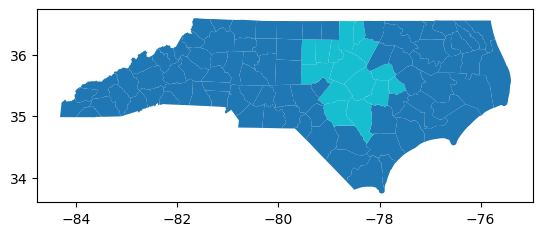

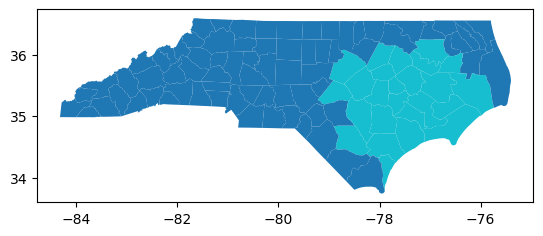

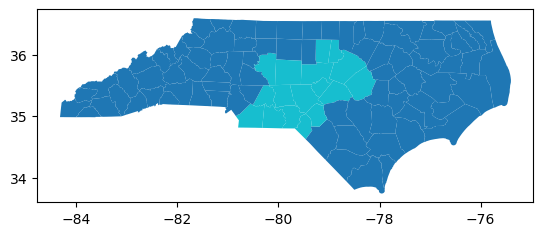

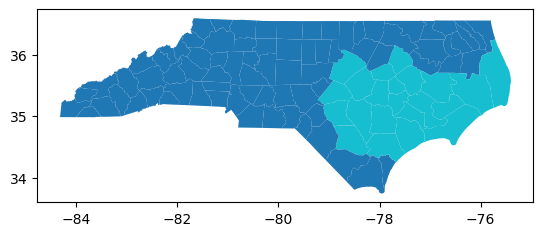

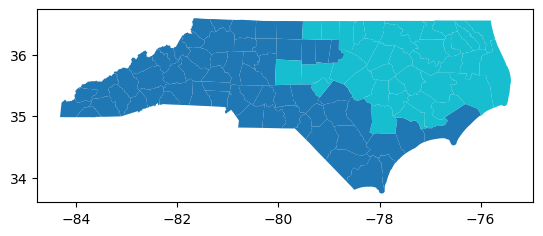

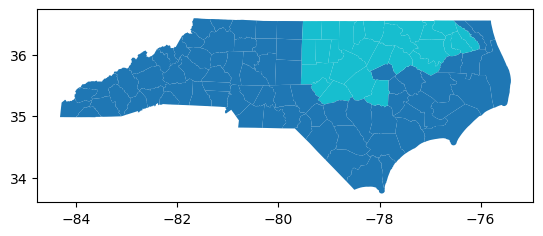

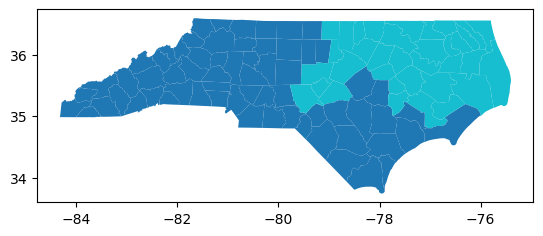

In [7]:
# Draw the districting plans
from draw import draw_single_district
filename = state + '_county.shp'

print("In no particular order, the top 10 clusters are:")
for district in districts:
    draw_single_district( filepath, filename, G, district, zoom=False )

In [8]:
print("clusters =",districts)

clusters = [[2, 11, 12, 21, 22, 24, 26, 31, 36, 39, 45, 47, 51, 57, 60, 64, 68, 69, 82, 88, 90, 91, 92, 94], [1, 2, 3, 11, 13, 16, 18, 19, 21, 22, 24, 26, 31, 36, 39, 41, 42, 45, 47, 57, 60, 69, 71, 82, 83, 92, 94, 98], [1, 2, 3, 8, 16, 18, 19, 21, 22, 24, 26, 27, 30, 31, 36, 39, 40, 41, 42, 45, 47, 55, 57, 60, 68, 69, 75, 77, 79, 82, 83, 92, 94, 96, 98], [0, 2, 11, 21, 24, 36, 39, 51, 57, 58, 60, 64, 71, 83, 90], [1, 2, 3, 11, 13, 19, 21, 22, 24, 25, 26, 27, 30, 31, 36, 39, 41, 45, 47, 69, 77, 83, 92, 94, 98], [0, 10, 11, 12, 21, 23, 28, 39, 50, 57, 59, 64, 67, 72, 73, 88, 99], [1, 2, 3, 11, 13, 19, 21, 24, 26, 27, 30, 31, 36, 39, 41, 55, 69, 71, 77, 83, 92, 94], [1, 2, 3, 8, 12, 16, 18, 19, 21, 22, 24, 26, 31, 36, 39, 40, 41, 42, 45, 47, 51, 55, 57, 60, 65, 67, 68, 69, 75, 79, 82, 90, 91, 92, 93, 94, 96, 98], [0, 8, 11, 12, 18, 21, 22, 31, 36, 39, 42, 45, 47, 51, 57, 58, 60, 64, 65, 68, 79, 82, 90, 91, 93, 96], [1, 2, 8, 11, 12, 16, 18, 19, 22, 24, 26, 31, 39, 40, 42, 45, 47, 51, 55,